In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

pd.set_option('display.max_columns', 500)

In [5]:
data_scaled = pd.read_csv('/Users/jordanbritt/Documents/Data Science Work/Data Science Projects/Speed Dating/speed_dating_feature_importances.csv')
data_scaled.head()

,Unnamed: 0,gender,match,int_corr,samerace,age_partmer,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,met_o,age,imprace,imprelig,goal,date_frequency,go_out,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,competitive_score,arts_score,fitness_score,overall_score_by_partner,overall_score_of_partner,race_partner_1.0,race_partner_2.0,race_partner_2.7900118553645523,race_partner_3.0,race_partner_4.0,race_partner_6.0,race_1.0,race_2.0,race_2.7906185261911807,race_3.0,race_4.0,race_6.0,purpose_non-romantic,purpose_romantic
0,0,0,0,0.14,0,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,2.0,21.0,2.0,4.0,2,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,12.0,28.0,14.0,44.0,40.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0.54,0,22.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,2.0,21.0,2.0,4.0,2,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,8.0,7.0,8.0,5.0,6.0,12.0,28.0,14.0,44.0,41.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,2,0,1,0.16,1,22.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,2.0,4.0,2,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,8.0,9.0,8.0,5.0,7.0,12.0,28.0,14.0,60.0,42.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,3,0,1,0.61,0,23.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,2.0,21.0,2.0,4.0,2,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,6.0,8.0,7.0,6.0,8.0,12.0,28.0,14.0,49.0,42.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,4,0,1,0.21,0,24.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,2.0,21.0,2.0,4.0,2,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,6.0,7.0,7.0,6.0,6.0,12.0,28.0,14.0,46.0,37.0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


# Objective #3: Build a predictive model with pre-interaction features

In [6]:
#getting only pre-interaction columns
data = data_scaled.drop(columns=['Unnamed: 0','dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'met_o', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'overall_score_of_partner', 'overall_score_by_partner', 'race_partner_2.7900118553645523', 'race_2.7906185261911807'])
data.columns

Index(['gender', 'match', 'int_corr', 'samerace', 'age_partmer', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age',
       'imprace', 'imprelig', 'goal', 'date_frequency', 'go_out', 'attr1_1',
       'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'competitive_score', 'arts_score', 'fitness_score', 'race_partner_1.0',
       'race_partner_2.0', 'race_partner_3.0', 'race_partner_4.0',
       'race_partner_6.0', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0',
       'race_6.0', 'purpose_non-romantic', 'purpose_romantic'],
      dtype='object')

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='match', ylabel='count'>

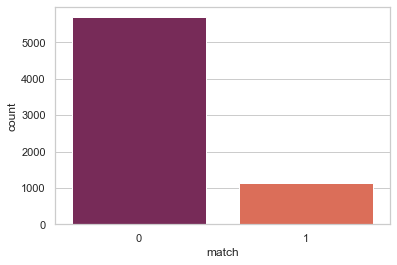

In [7]:
sns.countplot(data.match, palette='rocket')

Models we're going to test:
- logistic regression
- knn
- decision tree
- random forest
- XGBoost

We're going to deal with the class inbalance issue by using the SMOTE technique (Synthetic Minority Oversampling Technique). If the imbalance issue is not fixed, models with higher accuracy and better overall performance values will likely be overpredicting the lack of a match.

Accuracy is the most important performance indicator, then most likely F1 score after this.

We'll assess model performance without hyper-parameter tuning and tune the best performing model(s)


In [8]:
#importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import statistics


In [9]:
def model_performance_resampled(X, y, model_dictionary):
    #split train and test data 75% and 25%
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 21, stratify = y) #stratify ensures a proportional amount of match values in train and test data
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
    cv_results = {}
    cv_accuracy = {}
    test_results = {}
    train_accuracy = {}
    for model_name, model in model_dictionary.items():
        cv_results[model_name] = []
        cv_accuracy[model_name] = []
        train_accuracy[model_name] = []

        for indices in kf.split(X_train, y_train):
            train_ind = indices[0]
            val_ind = indices[1]
            X_train_real, y_train_real = X_train.iloc[train_ind], y_train.iloc[train_ind]
            X_resampled_train, y_resampled_train = SMOTE(random_state=21).fit_resample(X_train_real,y_train_real)
            X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
            X_resampled_val, y_resampled_val = SMOTE(random_state=21).fit_resample(X_val, y_val)
            model.fit(X_resampled_train, y_resampled_train)
            y_pred = model.predict(X_val)
            cv_results[model_name].append(f1_score(y_val, y_pred))
            cv_accuracy[model_name].append(100*model.score(X_val, y_val))
            train_accuracy[model_name].append(100*model.score(X_resampled_train, y_resampled_train))
    fig = plt.figure(figsize=(10, 10))
    for model_name, model in model_dictionary.items():
        #creating performance indicators
        cv_results[model_name] = 'F1 Score: {:.2f}'.format(np.mean(cv_results[model_name]))
        cv_accuracy[model_name] = 'Accuracy Score: {:.2f}%'.format(np.mean(cv_accuracy[model_name]))
        test_results[model_name] = 'Test Accuracy Score: {:.2f}%'.format(100*model.score(X_test, y_test))
        train_accuracy[model_name] = 'Train Accuracy Score: {:.2f}%'.format(np.mean(train_accuracy[model_name]))
        #creating ROC curve visualization
        fpr, tpr, threshold_curve = roc_curve(y_test, model.predict_proba(X_test)[::,1])
        plt.plot(fpr, tpr,lw=2, color =np.random.rand(3,), label = model_name)
        plt.plot([0,1],[0,1],c='red',ls='--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC Curve for Models')
        plt.legend()
    return cv_results, cv_accuracy, train_accuracy, test_results




In [10]:
def model_performance_not_resampled(X, y, model_dictionary):
        #split train and test data 75% and 25%
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 21, stratify = y) #stratify ensures a proportional amount of match values in train and test data
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
    cv_results = {}
    cv_accuracy = {}
    test_results = {}
    train_accuracy = {}
    for model_name, model in model_dictionary.items():
        cv_results[model_name] = []
        cv_accuracy[model_name] = []
        train_accuracy[model_name] = []

        for indices in kf.split(X_train, y_train):
            train_ind = indices[0]
            val_ind = indices[1]
            X_train_real, y_train_real = X_train.iloc[train_ind], y_train.iloc[train_ind]
            X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
            model.fit(X_train_real, y_train_real)
            y_pred = model.predict(X_val)
            cv_results[model_name].append(f1_score(y_val, y_pred))
            cv_accuracy[model_name].append(100*model.score(X_val, y_val))
            train_accuracy[model_name].append(100*model.score(X_train_real, y_train_real))
    fig = plt.figure(figsize=(10, 10))
    for model_name, model in model_dictionary.items():
        #creating performance indicators
        cv_results[model_name] = 'F1 Score: {:.2f}'.format(np.mean(cv_results[model_name]))
        cv_accuracy[model_name] = 'Accuracy Score: {:.2f}%'.format(np.mean(cv_accuracy[model_name]))
        test_results[model_name] = 'Test Accuracy Score: {:.2f}%'.format(100*model.score(X_test, y_test))
        train_accuracy[model_name] = 'Train Accuracy Score: {:.2f}%'.format(np.mean(train_accuracy[model_name]))
        #creating ROC curve visualization
        fpr, tpr, threshold_curve = roc_curve(y_test, model.predict_proba(X_test)[::,1])
        plt.plot(fpr, tpr,lw=2, color =np.random.rand(3,), label = model_name)
        plt.plot([0,1],[0,1],c='red',ls='--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC Curve for Models')
        plt.legend()
    return cv_results, cv_accuracy, train_accuracy, test_results

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

({'logreg': 'F1 Score: 0.23',
  'knn': 'F1 Score: 0.30',
  'dectree': 'F1 Score: 0.25',
  'forest': 'F1 Score: 0.18',
  'XGBoost': 'F1 Score: 0.24'},
 {'logreg': 'Accuracy Score: 71.26%',
  'knn': 'Accuracy Score: 59.86%',
  'dectree': 'Accuracy Score: 72.20%',
  'forest': 'Accuracy Score: 81.81%',
  'XGBoost': 'Accuracy Score: 81.53%'},
 {'logreg': 'Train Accuracy Score: 76.39%',
  'knn': 'Train Accuracy Score: 86.69%',
  'dectree': 'Train Accuracy Score: 99.90%',
  'forest': 'Train Accuracy Score: 99.90%',
  'XGBoost': 'Train Accuracy Score: 99.63%'},
 {'logreg': 'Test Accuracy Score: 73.06%',
  'knn': 'Test Accuracy Score: 60.92%',
  'dectree': 'Test Accuracy Score: 70.48%',
  'forest': 'Test Accuracy Score: 83.22%',
  'XGBoost': 'Test Accuracy Score: 82.34%'})

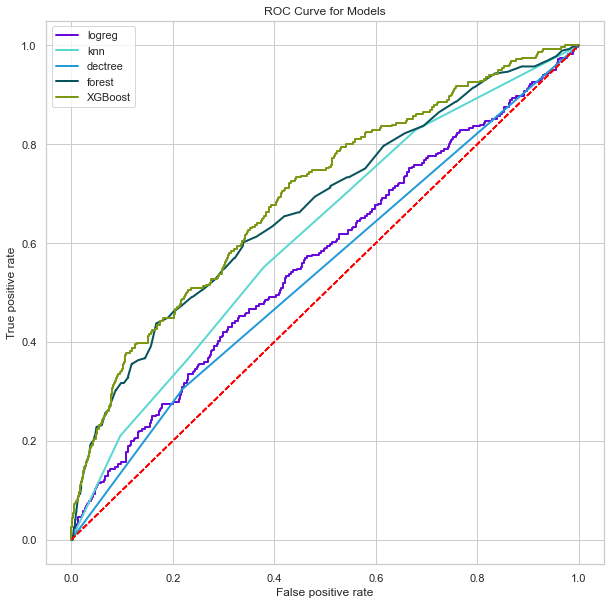

In [11]:
X = data.drop(columns='match')
y = data.match
model_dictionary = {'logreg':LogisticRegression(), 
             'knn': KNeighborsClassifier(),
             'dectree': DecisionTreeClassifier(),
             'forest': RandomForestClassifier(n_estimators = 100),
             'XGBoost': XGBClassifier()}
model_performance_resampled(X, y, model_dictionary)

Insights from this:
- Random forest and XGBoost seem to be performing best out of all of the models
- Both random forest and XGBoost are overfitting, but this is largely because of the resampling used to get higher performance on the test data.

The models overall are not incredibly robust. But that's largely to be expected; there's a lot that goes into a match that these models aren't accounting for. Lets fine-tune the XGBoost model and see what overall performance we can get.

Dealing with XGBoost Model:

In [12]:
def regularization_alpha_plot(X, y, regularization_parameters):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 21, stratify = y) 
    X_resampled_train, y_resampled_train = SMOTE(random_state=21).fit_resample(X_train,y_train)
    train_scores = []
    test_scores = []
    for value in regularization_parameters:
        model = XGBClassifier(reg_alpha=value)
        model.fit(X_resampled_train, y_resampled_train)
        train_scores.append(model.score(X_resampled_train, y_resampled_train))
        y_pred = model.predict(X_test)
        test_scores.append(accuracy_score(y_test, y_pred))
    fig, ax = plt.subplots()
    plt.plot(range(len(regularization_parameters)), train_scores, label = 'Train Accuracy')
    plt.plot(range(len(regularization_parameters)), test_scores, label = 'Test Accuracy')
    ax.set_xticks(range(len(regularization_parameters)))
    ax.set_xticklabels(regularization_parameters)
    plt.legend()
    plt.show()

def regularization_lambda_plot(X, y, regularization_parameters):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 21, stratify = y) 
    X_resampled_train, y_resampled_train = SMOTE(random_state=21).fit_resample(X_train,y_train)
    train_scores = []
    test_scores = []
    test_f1 = []
    for value in regularization_parameters:
        model = XGBClassifier(reg_lambda=value)
        model.fit(X_resampled_train, y_resampled_train)
        train_scores.append(model.score(X_resampled_train, y_resampled_train))
        y_pred = model.predict(X_test)
        test_scores.append(accuracy_score(y_test, y_pred))
        test_f1.append(f1_score(y_test, y_pred))
    fig, ax = plt.subplots()
    plt.plot(range(len(regularization_parameters)), train_scores, label = 'Train Accuracy')
    plt.plot(range(len(regularization_parameters)), test_scores, label = 'Test Accuracy')
    ax.set_xticks(range(len(regularization_parameters)))
    ax.set_xticklabels((regularization_parameters))
    plt.legend()

    
        


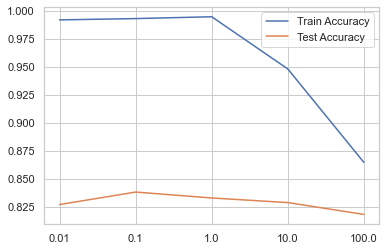

In [13]:
regularization_alpha_plot(X, y, list(np.logspace(-2, 2, 5)))

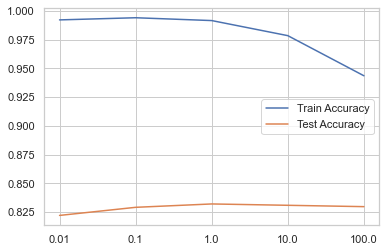

In [14]:
regularization_lambda_plot(X, y, list(np.logspace(-2, 2, 5)))

In [15]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 21, stratify = y) 
X_resampled_train, y_resampled_train = SMOTE(random_state=21).fit_resample(X_train,y_train)

regularization_parameters = {'reg_alpha': [1e-5, 1e-2, .01, 1, 50], 'max_depth': [4, 5 ,6], 'min_child_weight': range(1, 6, 2)}

xgboost = XGBClassifier(n_estimators = 100, reg_alpha=.1)

xg_search = GridSearchCV(estimator=xgboost, param_grid = regularization_parameters, cv=5, scoring='f1')
xg_search.fit(X_resampled_train, y_resampled_train)

print(xg_search.best_params_)
print(xg_search.best_score_)
predictions = xg_search.predict(X_test)


{'max_depth': 6, 'min_child_weight': 1, 'reg_alpha': 1}
0.7953025486651847


In [18]:
model2 = XGBClassifier(n_estimators = 100, reg_alpha=.1, max_depth=6, min_child_weight=1)
model2.fit(X_resampled_train, y_resampled_train)
predictions_model2 = model2.predict(X_test)
print(model2.score(X_resampled_train, y_resampled_train))
print(f'Accuracy Score for Test Data: {accuracy_score(y_test, predictions_model2)}')
print(f'F1 Score: {f1_score(y_test, predictions_model2)}')

confusion_matrix(y_test, predictions_model2)

0.9928554696650269
Accuracy Score for Test Data: 0.8380281690140845
F1 Score: 0.35514018691588783


array([[1352,   71],
       [ 205,   76]])

For poop and giggles lets see how performance would have changed if we had used un-resampled training data

In [17]:
model3 = XGBClassifier(n_estimators = 100, reg_alpha=.1, max_depth=6, min_child_weight=1)
model3.fit(X_train, y_train)
predictions = model2.predict(X_test)
print(model2.score(X_train, y_train))
print(f'Accuracy Score for Test Data: {accuracy_score(y_test, predictions)}')
print(f'F1 Score: {f1_score(y_test, predictions)}')

confusion_matrix(y_test, predictions)

0.9917840375586855
Accuracy Score for Test Data: 0.835093896713615
F1 Score: 0.2886075949367089


array([[1366,   57],
       [ 224,   57]])

In [24]:
print('Final Model Performance Metrics: ')

print(classification_report(y_test, predictions_model2))


Final Model Performance Metrics: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1423
           1       0.52      0.27      0.36       281

    accuracy                           0.84      1704
   macro avg       0.69      0.61      0.63      1704
weighted avg       0.81      0.84      0.82      1704



Using resampling and fine-tuning a few parameters yielded some solid performance gains, and just with pre-interaction measures we can correctly identify over 50% of total matches in the test dataset.